# Data Analysis of the US Accidents from 2016 to 2023- Swami Charan Rao Beeravelly

In [64]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/swamicharanrao/Downloads/US_Accidents_March23.csv') 
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [215]:
len(df)

7728394

The dataset has 7728394 rows and 46 features and they are listed below

In [3]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

The type of the feature is given below

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

Checking for null values in the data set

In [217]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values != 0 ].sort_values(ascending = False) 
missing_values

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Sunrise_Sunset             23246
Civil_Twilight             23246
Nautical_Twilight          23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
dtype: int64

Finding the percentage of the missing values per column

In [9]:
missing_values= missing_values/ len(df)
missing_values

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Description              6.469649e-07
Street                   1.406372e-03
City                     3.273643e-05
Zipcode                  2.477876e-04
Timezone                 1.010300e-03
Airport_Code             2.928810e-03
Weather_Timestamp        1.555666e-02
Temperature(F)           2.120143e-02
Wind_Chill(F)            2.586590e-01
Humidity(%)              2.253301e-02
Pressure(in)             1.820288e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Wind_Speed(mph)          7.391355e-02
Precipitation(in)        2.851286e-01
Weather_Condition        2.244438e-02
Sunrise_Sunset           3.007869e-03
Civil_Twilight           3.007869e-03
Nautical_Twilight        3.007869e-03
Astronomical_Twilight    3.007869e-03
dtype: float64

<Axes: >

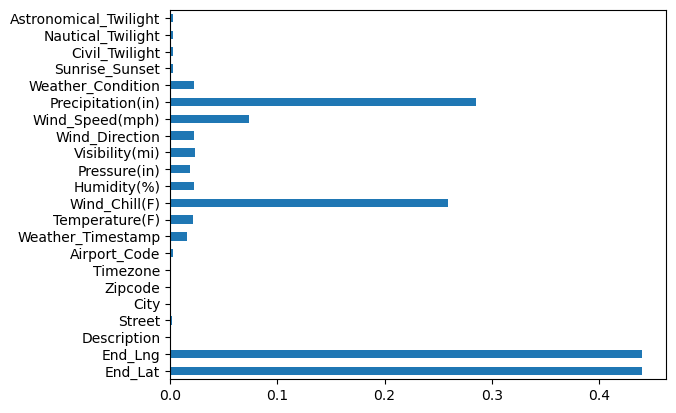

In [11]:
missing_values.plot(kind = 'barh')

We can see that more than 40% of few columns are NAN values. We cannot do any analysis by taking those columns into consideration. So we ignore them in our analysis.

Analyzing number of accidents per city. 

In [219]:
df.City.nunique()

13678

There are a total of 13678 cities in the data

In [13]:
accident_per_city_count= df.City.value_counts()
accident_per_city_count

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

<Axes: ylabel='City'>

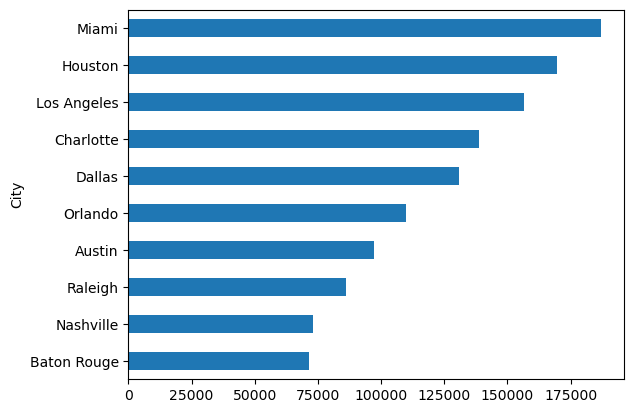

In [27]:
accident_per_city_count[:10].sort_values().plot(kind = 'barh')

From above, we can analyze that the city of Miami has the highest number of accidents compared to others

In [28]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Calculating the percentage of high and low accident prone cities. Considering 1000 number of accidents as a threshold

In [46]:
high_accident_cities = accident_per_city_count[accident_per_city_count >= 1000]
low_accident_cities  = accident_per_city_count[accident_per_city_count < 1000 ]  

In [51]:
cities = df.City.unique()
cities

array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Ness City',
       'Clarksdale', 'American Fork-Pleasant Grove'], dtype=object)

What is the percentage of higher accicent cities among all the cities?

In [52]:
Percent= len(high_accident_cities)/ len(cities) * 100
Percent

8.904159660793917

Calculating the number of accidents per state

In [132]:
accidents_per_state = df.groupby('State').size()
accidents_per_state

State
AL     101044
AR      22780
AZ     170609
CA    1741433
CO      90885
CT      71005
DC      18630
DE      14097
FL     880192
GA     169234
IA      26307
ID      11376
IL     168958
IN      67224
KS      20992
KY      32254
LA     149701
MA      61996
MD     140417
ME       2698
MI     162191
MN     192084
MO      77323
MS      15181
MT      28496
NC     338199
ND       3487
NE      28870
NH      10213
NJ     140719
NM      10325
NV      21665
NY     347960
OH     118115
OK      83647
OR     179660
PA     296620
RI      16971
SC     382557
SD        289
TN     167388
TX     582837
UT      97079
VA     303301
VT        926
WA     108221
WI      34688
WV      13793
WY       3757
dtype: int64

<Axes: xlabel='State'>

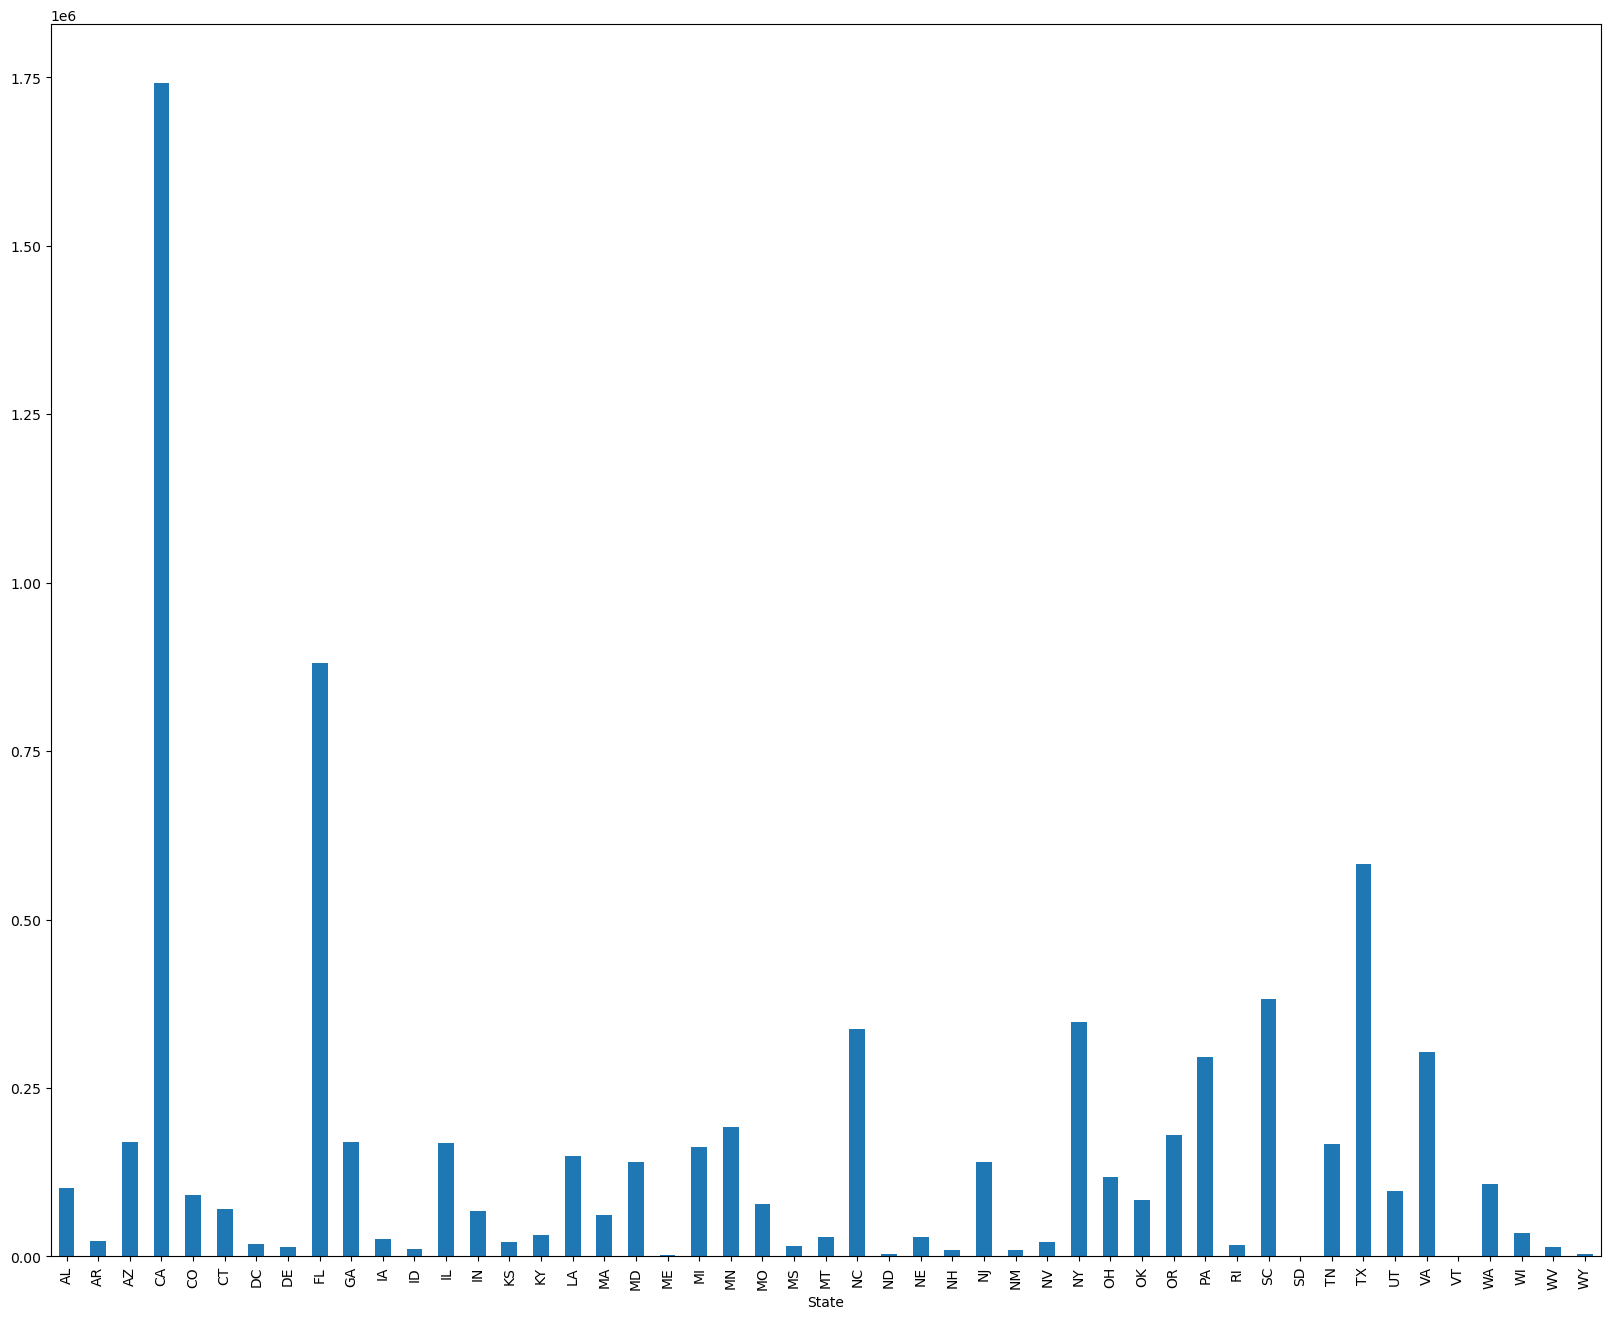

In [133]:
plt.figure(figsize=(20, 16))
accidents_per_state.plot(kind = 'bar')


This says California has the highest no of accidents

# Disrtibution of accidents over US 

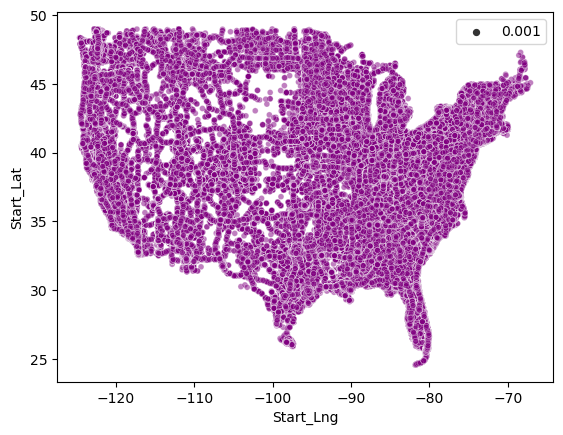

In [222]:
sns.scatterplot( x = df.Start_Lng , y = df.Start_Lat, size = 0.001  ,alpha = 0.5 ,color= 'purple') 
plt.show()

The plot will show how these two variables (representing locations) are distributed, and where most of the accidents occur geographically on the map of US.

# Frequency of accidents over a day

What time of the day did the accidents occur most frequently?

In [136]:
df.Start_Time = pd.to_datetime(df['Start_Time'] , format='mixed', errors='coerce' ) 

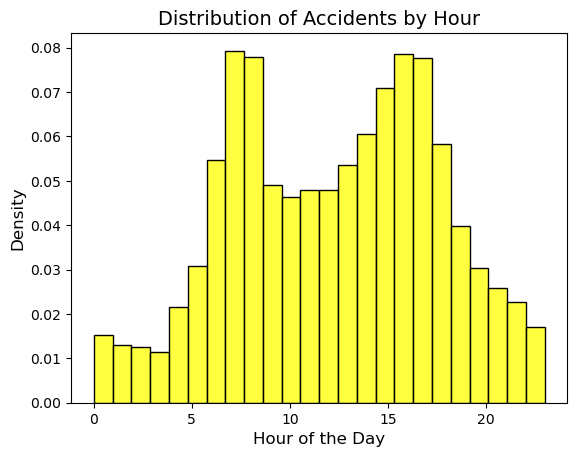

In [142]:
sns.histplot( df.Start_Time.dt.hour , bins = 24 , kde = False, stat='density' ,color = 'yellow')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Accidents by Hour', fontsize=14)

We can see that most accidents happen from 6 am to 9 am and from 1 pm to 7 pm

# Frequency of accidents over the week

What day of the week did the accidents occur most frequently?

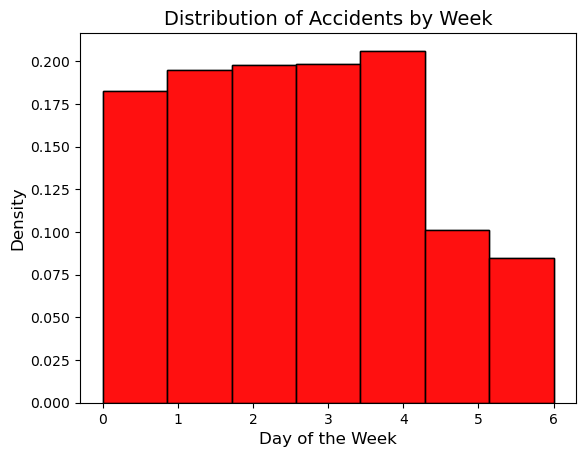

In [227]:
sns.histplot( df.Start_Time.dt.dayofweek , bins = 7 , kde = False , stat='density' , color = 'red')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Accidents by Week', fontsize=14)
plt.show()


We can observe that most of the accidents occur on the weekdays

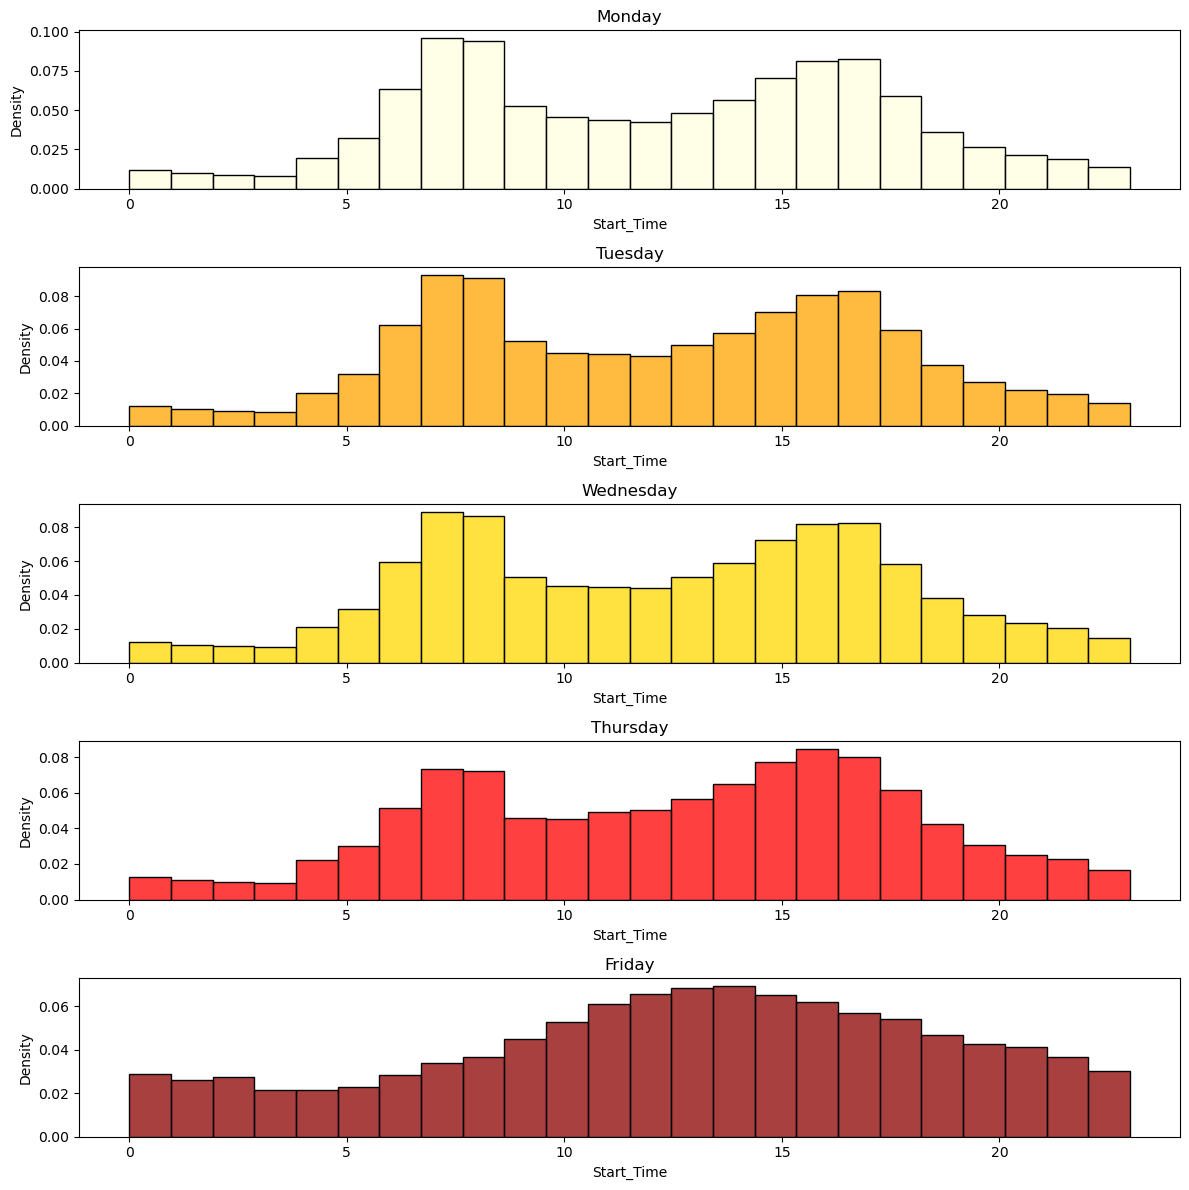

In [228]:
mon_day = df.Start_Time [ df.Start_Time.dt.dayofweek == 1 ] 
tues_day = df.Start_Time [ df.Start_Time.dt.dayofweek == 2 ] 
wednes_day = df.Start_Time [ df.Start_Time.dt.dayofweek == 3 ] 
thurs_day = df.Start_Time [ df.Start_Time.dt.dayofweek == 4 ] 
fri_day= df.Start_Time [ df.Start_Time.dt.dayofweek == 5 ] 

fig , axis = plt.subplots(5,1 , figsize = ( 12 , 12)) 
sns.histplot(mon_day.dt.hour , bins = 24 , kde = False ,stat='density' ,ax = axis[0] , color = '#FFFFE0').set_title('Monday') 
sns.histplot(tues_day.dt.hour , bins = 24 , kde= False ,stat='density',ax = axis[1] , color = 'orange').set_title('Tuesday')
sns.histplot(wednes_day.dt.hour , bins = 24 , kde= False ,stat='density' ,ax = axis[2] , color = 'gold').set_title('Wednesday') 
sns.histplot(thurs_day.dt.hour , bins = 24 , kde= False ,stat='density' ,ax = axis[3] , color = 'red').set_title('Thursday')
sns.histplot(fri_day.dt.hour , bins = 24 , kde= False ,stat='density' ,ax = axis[4] , color = '#8B0000').set_title('Friday')
fig.tight_layout()
plt.show()

On weekends

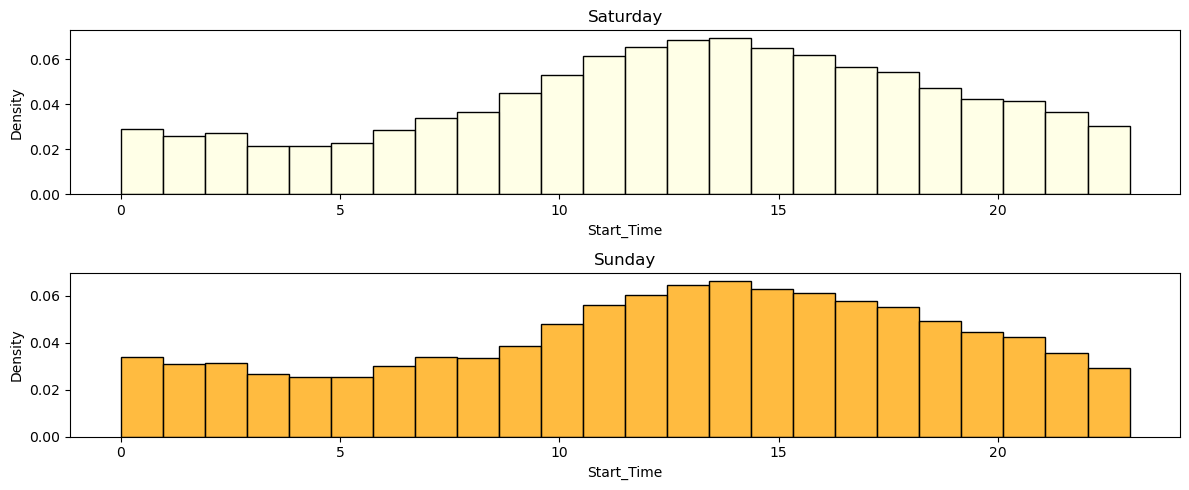

In [171]:
Sat_day = df.Start_Time [ df.Start_Time.dt.dayofweek == 5 ] 
Sun_day = df.Start_Time [ df.Start_Time.dt.dayofweek == 6 ] 
fig , axis = plt.subplots(2,1 , figsize = ( 12 , 5)) 
sns.histplot(Sat_day.dt.hour , bins = 24 , kde = False ,stat='density' ,ax = axis[0] , color = '#FFFFE0').set_title('Saturday') 
sns.histplot(Sun_day.dt.hour , bins = 24 , kde= False ,stat='density',ax = axis[1] , color = 'orange').set_title('Sunday')
fig.tight_layout()
plt.show()

We can see that thare is the difference between the distributioins of the accident time in weekends and normal days.
On weekends generally accidents happens from 10 am to 7pm while on weekdays most accidents occured from 6 am to 9 am and from 1 pm to 7 pm.

# Frequency of accidents over the months

/var/folders/yg/068byv7142l5wlw3fzb9fbpm0000gn/T/ipykernel_20371/926735137.py:2: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


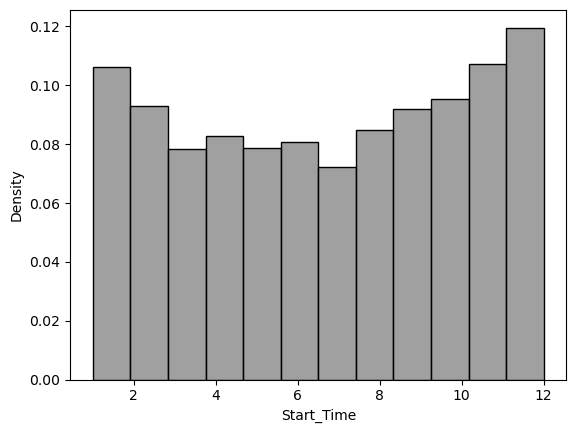

In [230]:
sns.histplot( df.Start_Time.dt.month , kde = False , bins = 12 , stat='density' , color = 'grey')
fig.tight_layout()
plt.show()

Higher number of accidents takles place in the later half of the year.

# Severity of the accidents

What was the most severity of the accidents occured?

In [192]:
df['Severity'].value_counts()

Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64

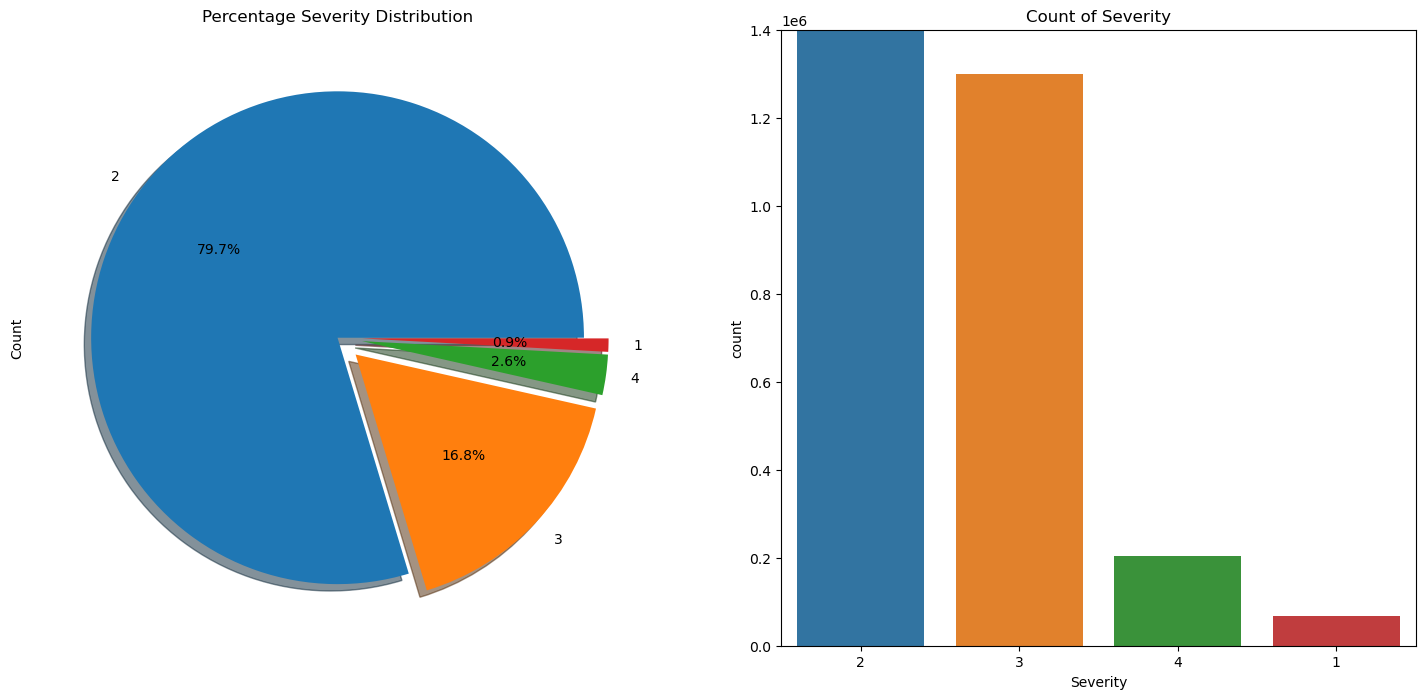

In [191]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Severity'].value_counts().plot.pie(explode=[0,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Count')
sns.countplot(x='Severity',data=df,ax=ax[1],order=df['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
ax[1].set_ylim(0, 1400000)
plt.show()

We can see that most of the accidents were of a severity level 2

# Temperature

At what temperatures did most of the accidents occur?

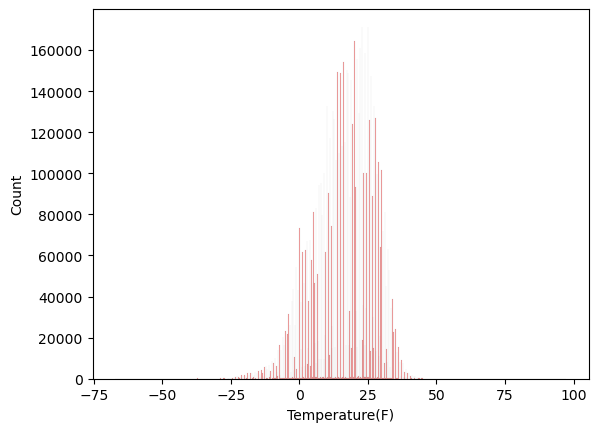

In [198]:
sns.histplot( (df['Temperature(F)'] - 32 ) * (5/9)   , kde = False ,  color = '#F08080')  
plt.show()

Most of the Accidents are occured in between the 0C to 30C

# Weather conditions 

What are the different weather conditions for the accidents

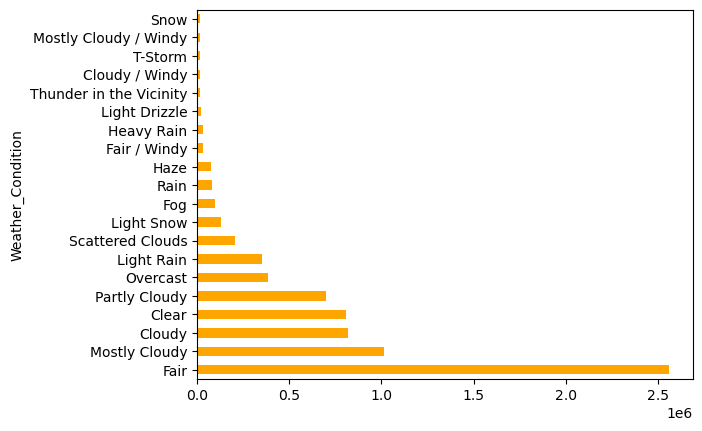

In [200]:
df.Weather_Condition.value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh' , color = 'orange') 
plt.show()

What are the top 5 weather conditions for the accidents to happen?

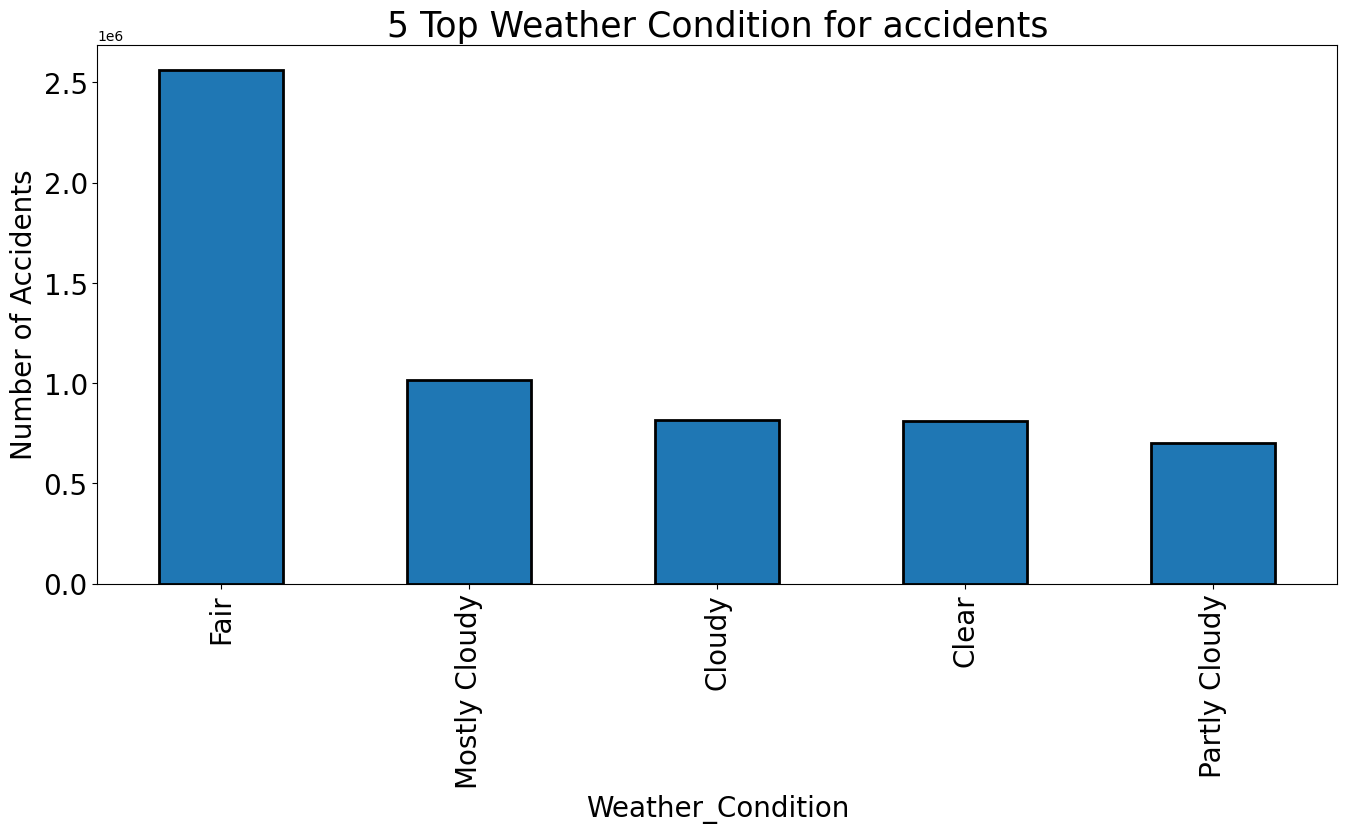

In [223]:
fig, ax=plt.subplots(figsize=(16,7))
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top Weather Condition for accidents',fontsize=25)
plt.show()

A pie chart representing the number of accidents in each weather conditions

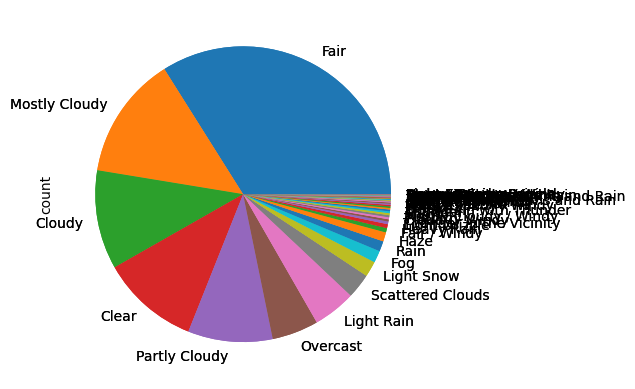

In [203]:
total_weather_conditions = df.Weather_Condition.unique()
len(total_weather_conditions) , total_weather_conditions
accidents_per_weather = df.Weather_Condition.value_counts() 
High_accident_weather = accidents_per_weather [accidents_per_weather >= 1000 ] 
low_accident_weather = accidents_per_weather [accidents_per_weather < 1000]   

len(High_accident_weather) / len(total_weather_conditions) * 100 , len(low_accident_weather) / len(total_weather_conditions) * 100
High_accident_weather.plot(kind='pie')
plt.show()

# Accidents over years

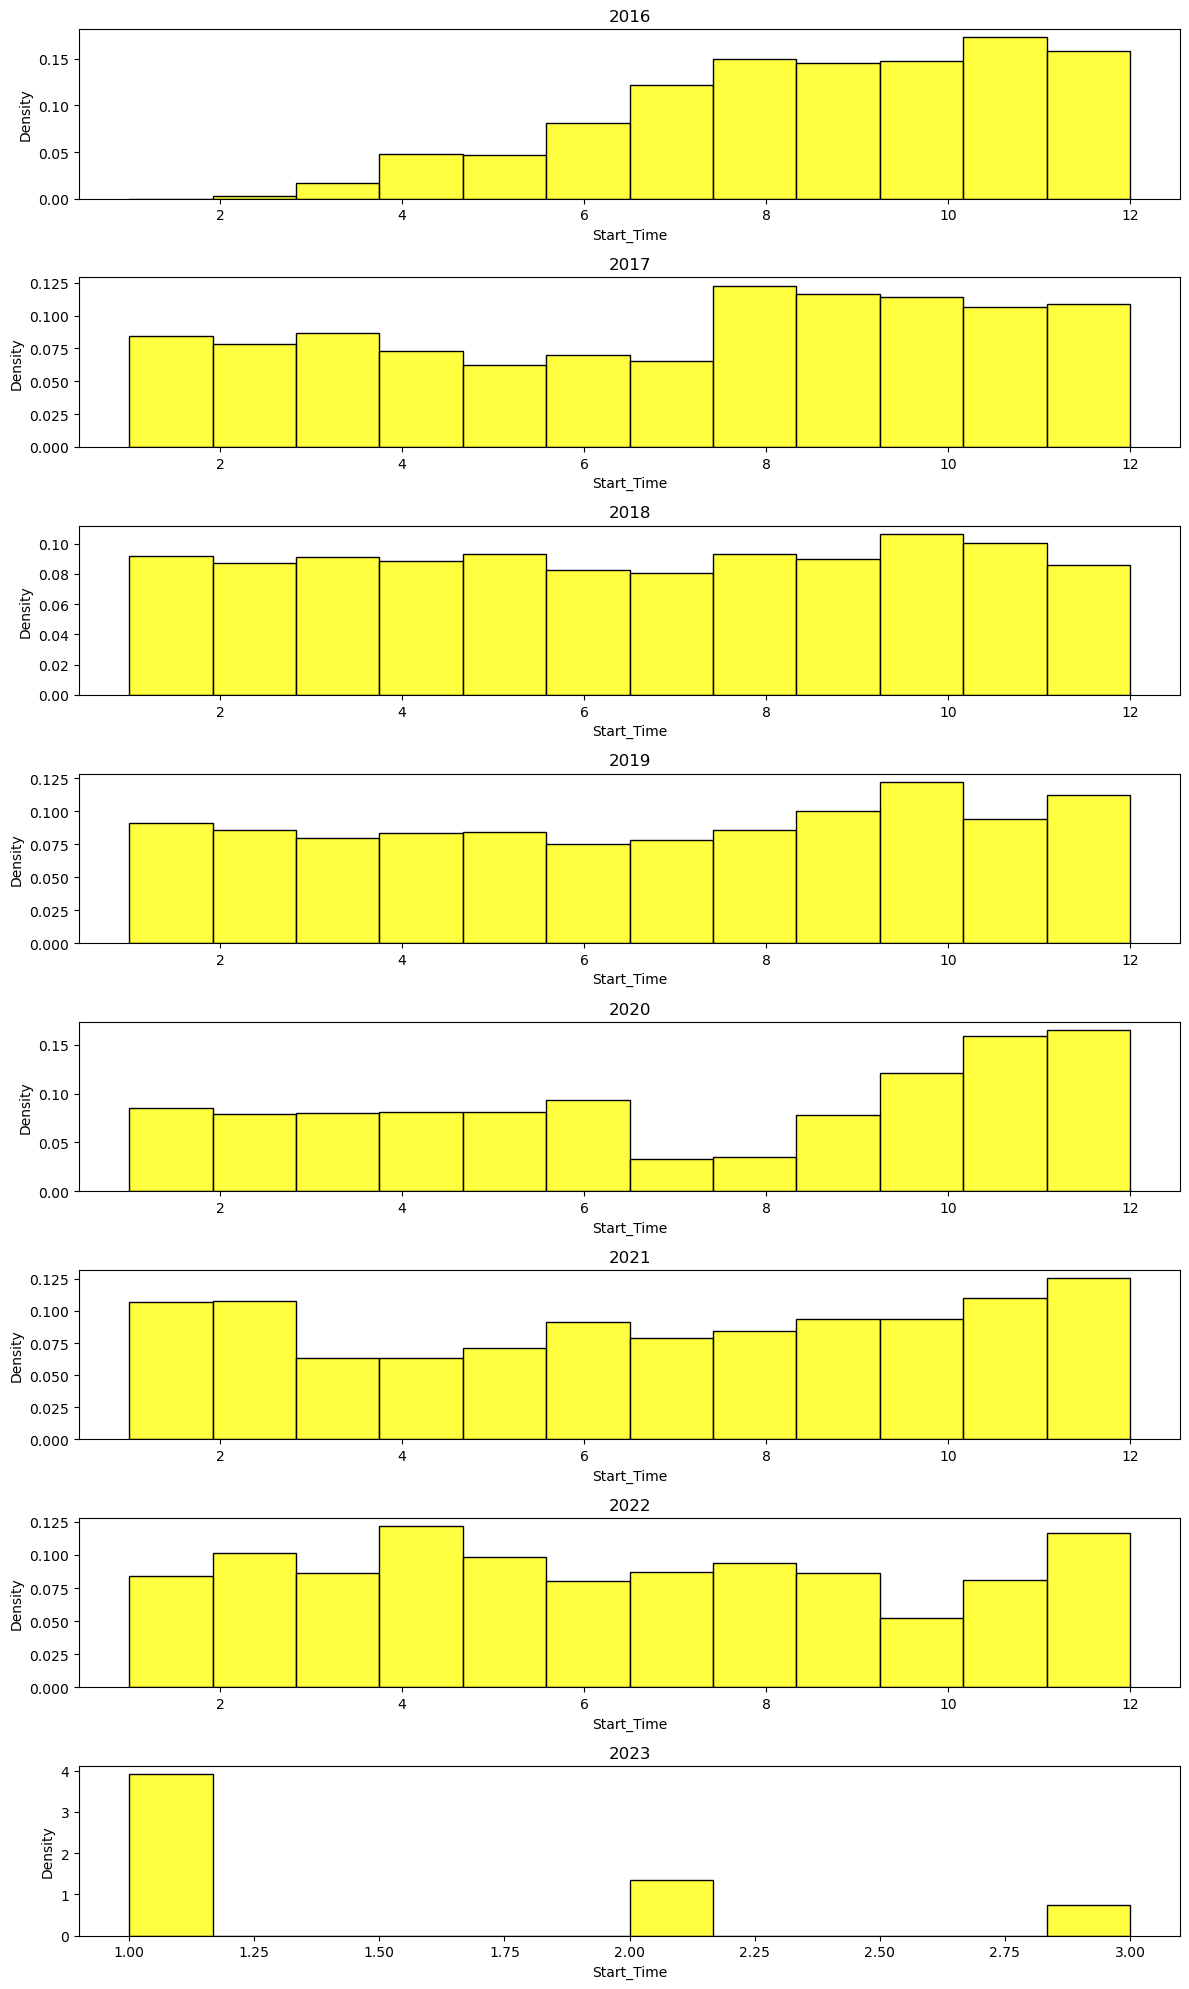

In [214]:
data_2016 = df.Start_Time [ df.Start_Time.dt.year == 2016 ]
data_2017= df.Start_Time [ df.Start_Time.dt.year == 2017 ] 
data_2018 = df.Start_Time [ df.Start_Time.dt.year == 2018 ] 
data_2019 = df.Start_Time [ df.Start_Time.dt.year == 2019 ]
data_2020 = df.Start_Time [ df.Start_Time.dt.year == 2020 ] 
data_2021 = df.Start_Time [ df.Start_Time.dt.year == 2021 ]
data_2022 = df.Start_Time [ df.Start_Time.dt.year == 2022 ] 
data_2023 = df.Start_Time [ df.Start_Time.dt.year == 2023 ]

fig , axes = plt.subplots( 8, 1, figsize = (12,20) )
sns.histplot(data_2016.dt.month, kde = False , bins = 12 , stat='density' , ax = axes[0] , color = 'yellow').set_title('2016')
sns.histplot(data_2017.dt.month, kde = False , bins = 12 , stat='density', ax = axes[1] , color = 'yellow' ).set_title('2017')
sns.histplot(data_2018.dt.month, kde = False , bins = 12 , stat='density' , ax = axes[2] , color = 'yellow' ).set_title('2018')
sns.histplot(data_2019.dt.month, kde = False , bins = 12 , stat='density' , ax = axes[3] , color = 'yellow' ).set_title('2019')
sns.histplot(data_2020.dt.month, kde = False , bins = 12 , stat='density', ax = axes[4] , color = 'yellow').set_title('2020')
sns.histplot(data_2021.dt.month, kde = False , bins = 12 ,stat='density', ax = axes[5] , color = 'yellow' ).set_title('2021')
sns.histplot(data_2022.dt.month, kde = False , bins = 12 , stat='density', ax = axes[6] , color = 'yellow' ).set_title('2022')
sns.histplot(data_2023.dt.month, kde = False , bins = 12 , stat='density' , ax = axes[7] , color = 'yellow' ).set_title('2023')
fig.tight_layout()
plt.show()

We can see that there are irregularities in data for the years 2016 and 2023.

In [234]:
df['Year'] = df['Start_Time'].dt.year
accidents_per_year = df.groupby('Year').size()

# Find the year with the highest number of accidents
max_accidents_year = accidents_per_year.idxmax()
max_accidents_count = accidents_per_year.max()
max_accidents_count, max_accidents_year

(1762452, 2022)

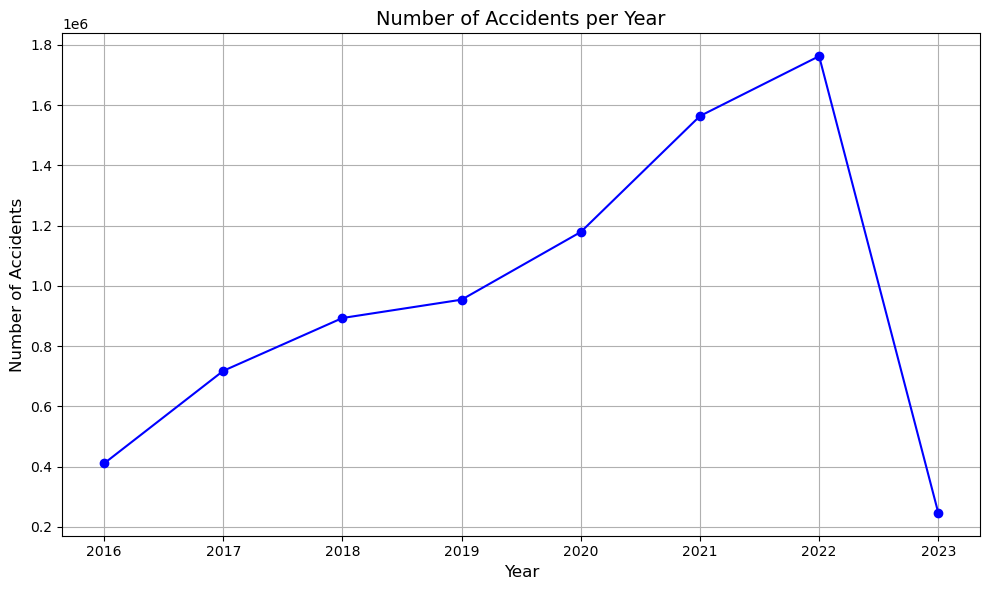

In [235]:
plt.figure(figsize=(10, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.title('Number of Accidents per Year', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

We can see that the maximum number of accidents peeked in the year 2022 with 1762452.

If we exclude the years 2016 and 2023, we get the following graph.

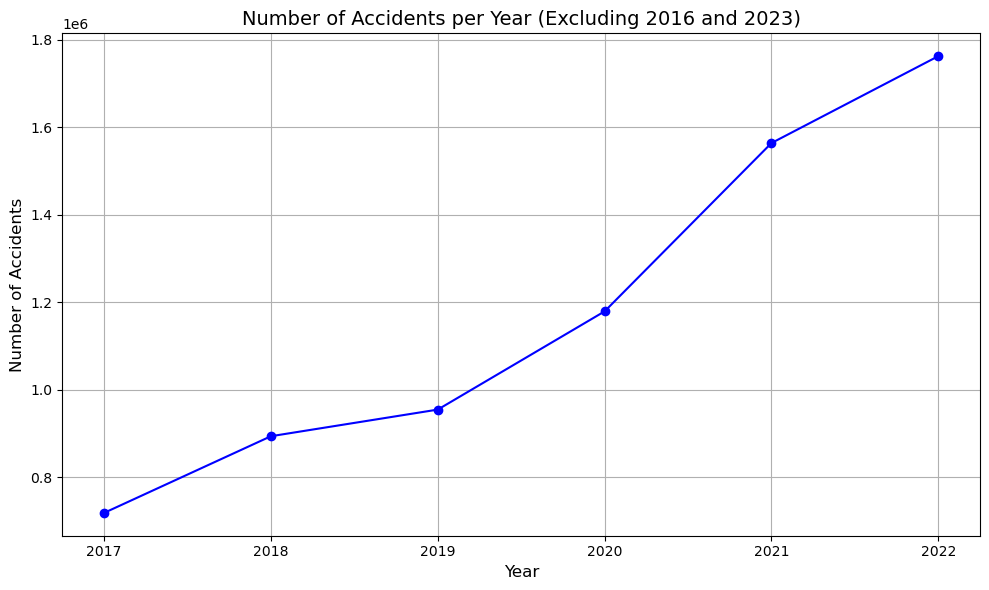

In [237]:
df_filtered = df[~df['Year'].isin([2016, 2023])]

# Group by 'Year' and count the number of accidents in each year
accidents_per_year = df_filtered.groupby('Year').size()
# Plotting the number of accidents per year, excluding 2016 and 2023
plt.figure(figsize=(10, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.title('Number of Accidents per Year (Excluding 2016 and 2023)', fontsize=14)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

Thus ends our Exploratory Data Analysis of the US Accidents 2016-2023

# Conclusions

Here are the few conclusion I can make from the EDA
1. California has the highest number of accidents followed by Florida.
2. The city with highest number of accidents is Miami.
3. Typically most accidents happen between 6 am to 9 am and 1 pm to 7 pm.
4. More number of accidenbts happen on weekdays compared to the weekends.
5. On weekends generally accidents happens between 10 am to 7pm.
6. Higher number of accidents takles place in the later half of the year.
7. The top weather conditions in whic accidents occur are fair and cloudy.
8. We see that the number of accidents peaked in the year 2022.
9. Most number o0f accidents occured when the temperature was about 20C.
10. We also observed that there are few missing values and irregularities in the dataset. I chose to ignore those columns in the analysis.
